<a href="https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp?scriptVersionId=150496626" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа

ДОБРО ПОЖАЛОВАТЬ НА СТРАНИЦУ РЕЙТИНГОВ ГОЛУБЫХ ФИШЕК МОСКОВСКОЙ БИРЖИ ПО АБСОЛЮТНЫМ КУРСАМ И КОЭФФИЦИЕНТУ ШАРПА

Мы рады приветствовать вас на странице, посвященной рейтингам голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа. Наша страница предоставляет вам уникальную возможность оценить доходность 20 выбранных бумаг из списка "голубых фишек" Мосбиржи на различных временных промежутках.

На странице представлены рейтинги для каждого периода, включая месяц, квартал, полгода, год, 2 года, 3 года и 5 лет. Для удобства анализа мы использовали столбчатые диаграммы, отображающие коэффициент Шарпа абсолютного курса бумаг. Бумаги отсортированы по убыванию коэффициента Шарпа, что позволяет вам быстро определить самые выгодные и невыгодные акции. По горизонтальной оси диаграмм вы найдете коды бумаг, чтобы легко идентифицировать каждую из них. 

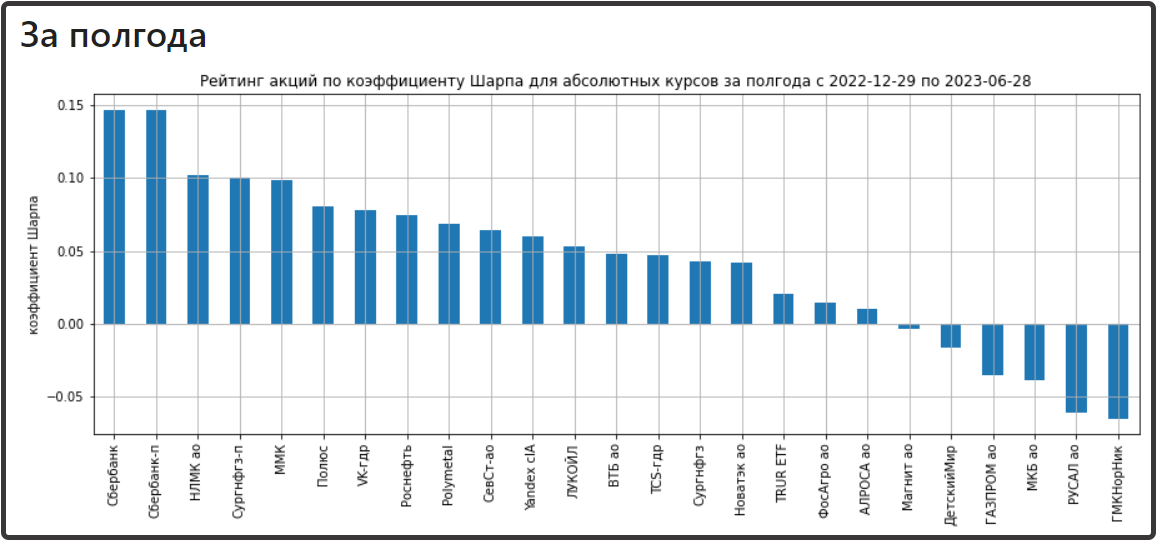

Коэффициент Шарпа считается как отношение средней дневной доходнсти к стандартному отклонению этой средней дневной доходности.

$$
coefSharp = \frac{mean(\frac{A_{i+1}-A_i}{A_i},i=start...end)}{std(\frac{A_{i+1}-A_i}{A_i},i=start...end)}
$$

Под графиками рейтингов мы предоставляем таблицу, содержащую информацию о самых выгодных и невыгодных бумагах с высоким и низким коэффициентом Шарпа соответственно. В таблице вы найдете коды бумаг, их категории и соответствующие коэффициенты Шарпа. Кроме того, мы предоставляем ссылки на страницы с графиками истории абсолютного и рублевого курса каждой из этих бумаг, что позволяет вам получить более полное представление об их доходности.

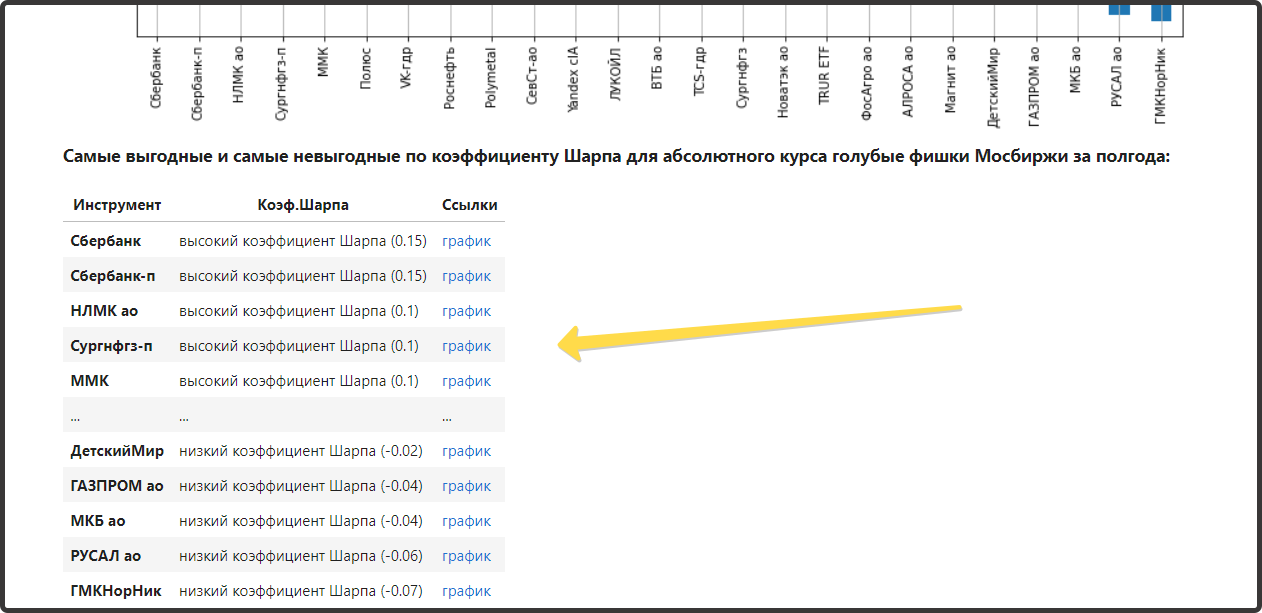

Ниже таблицы, вы также найдете ссылки на разделы проекта, соответствующие выбранному временному промежутку. Это дает вам возможность получить более детальную информацию о голубых фишках Мосбиржи и их доходности на определенных временных интервалах.

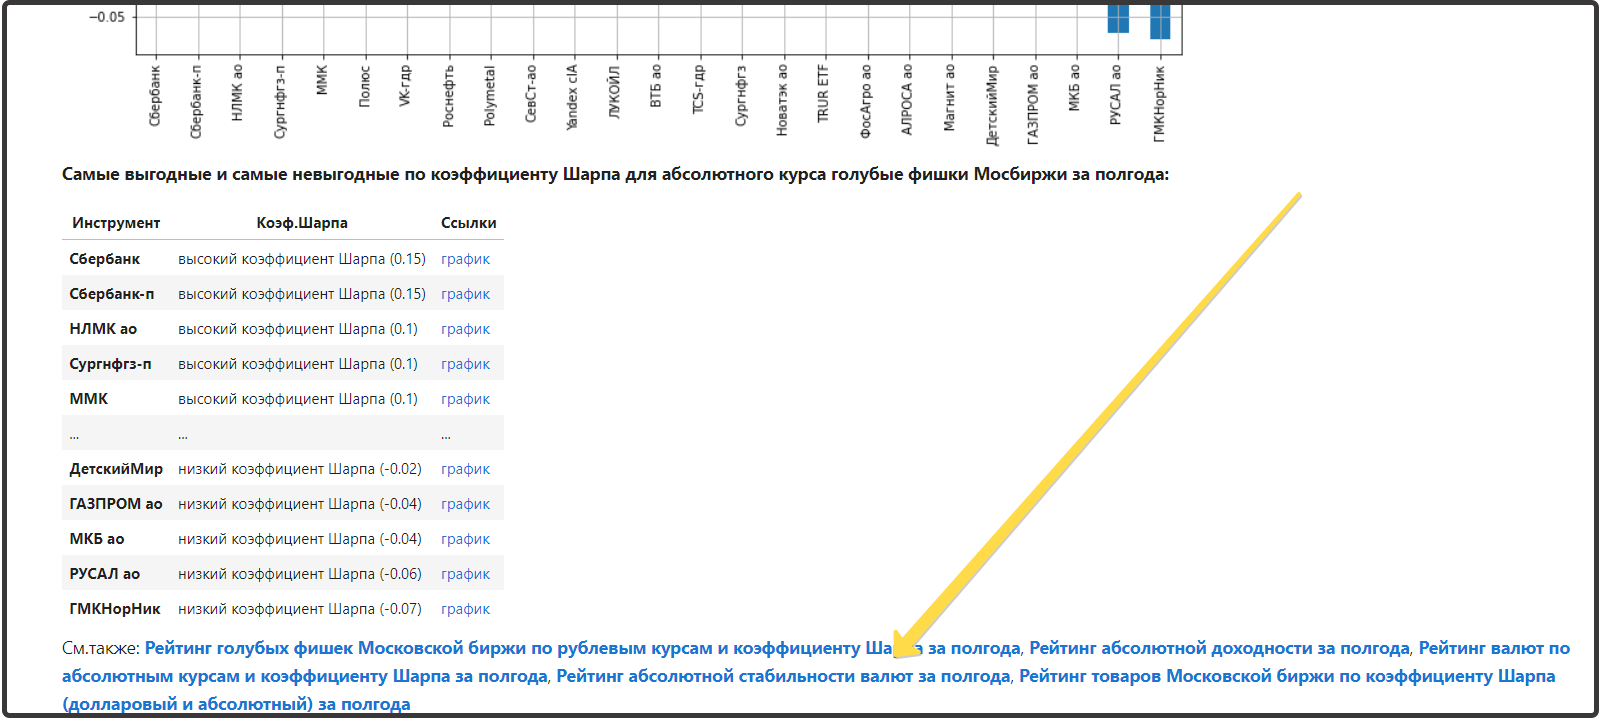

Для вашего удобства мы предоставляем правое боковое меню, которое позволяет вам перемещаться между различными бумагами и изучать их рейтинги и графики.

Мы надеемся, что эти улучшения сделают нашу страницу с рейтингами голубых фишек Московской биржи более информативной и полезной для ваших инвестиционных решений. Мы стремимся предоставить вам наиболее точную и актуальную информацию для помощи в принятии осознанных финансовых решений.

Если у вас возникнут вопросы или предложения, пожалуйста, свяжитесь с нами. Мы всегда готовы помочь и принять во внимание вашу обратную связь.

# Оглавление проекта "Абсолютный валютный курс" 

![Проект "Абсолютный валютный курс"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/@eavprog8/community) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/s/1826351-absolyutnyy-kurs-valyut) - 
[**Kaggle**](https://www.kaggle.com/code/eavprog/abscur-about)

## Абсолютные валютные курсы:
- [О проекте](https://www.kaggle.com/eavprog/abscur-about)
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Парные валютные курсы
- [Графики истории парных валютных курсов](https://www.kaggle.com/eavprog/abscur-par-hist)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# За месяц

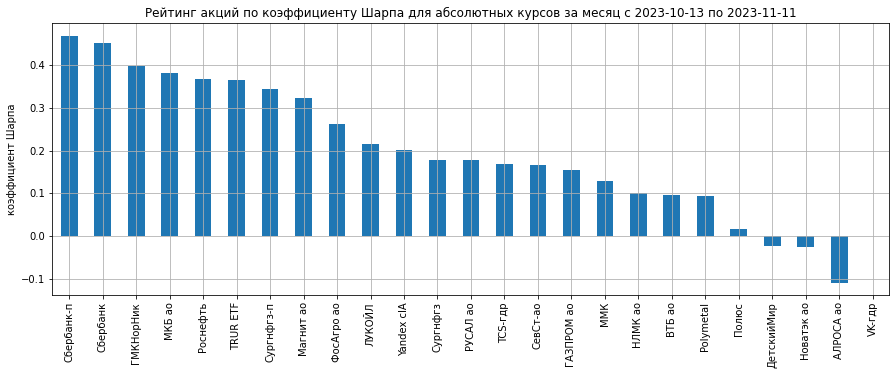

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для абсолютного курса голубые фишки Мосбиржи за месяц:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**Сбербанк-п**|высокий коэффициент Шарпа (0.47)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк-п)|
|**Сбербанк**|высокий коэффициент Шарпа (0.45)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк)|
|**ГМКНорНик**|высокий коэффициент Шарпа (0.4)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГМКНорНик)|
|**МКБ ао**|высокий коэффициент Шарпа (0.38)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#МКБ-ао)|
|**Роснефть**|высокий коэффициент Шарпа (0.37)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Роснефть)|
|...|...|...|
|**Полюс**|низкий коэффициент Шарпа (0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Полюс)|
|**ДетскийМир**|низкий коэффициент Шарпа (-0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ДетскийМир)|
|**Новатэк ао**|низкий коэффициент Шарпа (-0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Новатэк-ао)|
|**АЛРОСА ао**|низкий коэффициент Шарпа (-0.11)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#АЛРОСА-ао)|
|**VK-гдр**|низкий коэффициент Шарпа (0)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#VK-гдр)|


См.также: [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-месяц), [**Рейтинг абсолютной доходности за месяц**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-месяц), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-месяц), [**Рейтинг абсолютной стабильности валют за месяц**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-месяц), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за месяц**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-месяц)

# За квартал

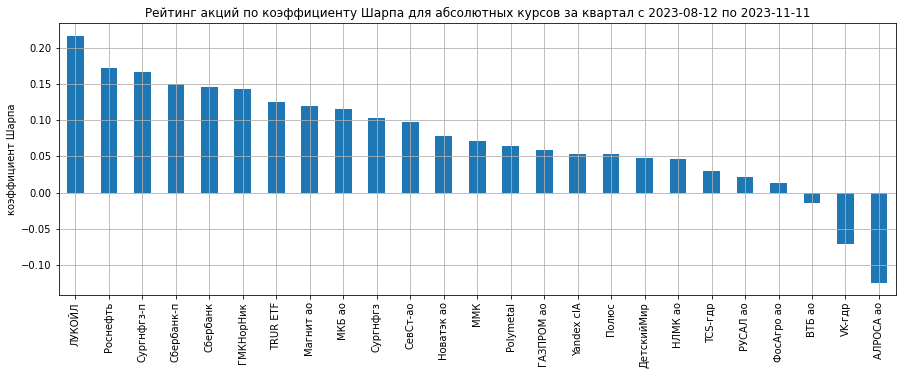

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для абсолютного курса голубые фишки Мосбиржи за квартал:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**ЛУКОЙЛ**|высокий коэффициент Шарпа (0.22)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ЛУКОЙЛ)|
|**Роснефть**|высокий коэффициент Шарпа (0.17)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Роснефть)|
|**Сургнфгз-п**|высокий коэффициент Шарпа (0.17)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сургнфгз-п)|
|**Сбербанк-п**|высокий коэффициент Шарпа (0.15)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк-п)|
|**Сбербанк**|высокий коэффициент Шарпа (0.15)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк)|
|...|...|...|
|**РУСАЛ ао**|низкий коэффициент Шарпа (0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#РУСАЛ-ао)|
|**ФосАгро ао**|низкий коэффициент Шарпа (0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**ВТБ ао**|низкий коэффициент Шарпа (-0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ВТБ-ао)|
|**VK-гдр**|низкий коэффициент Шарпа (-0.07)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#VK-гдр)|
|**АЛРОСА ао**|низкий коэффициент Шарпа (-0.12)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#АЛРОСА-ао)|


См.также: [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-квартал), [**Рейтинг абсолютной доходности за квартал**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-квартал), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-квартал), [**Рейтинг абсолютной стабильности валют за квартал**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-квартал), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за квартал**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-квартал)

# За полгода

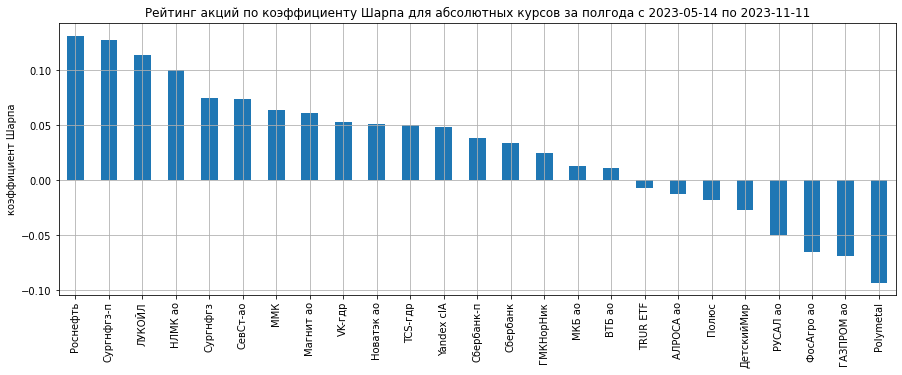

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для абсолютного курса голубые фишки Мосбиржи за полгода:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**Роснефть**|высокий коэффициент Шарпа (0.13)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Роснефть)|
|**Сургнфгз-п**|высокий коэффициент Шарпа (0.13)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сургнфгз-п)|
|**ЛУКОЙЛ**|высокий коэффициент Шарпа (0.11)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ЛУКОЙЛ)|
|**НЛМК ао**|высокий коэффициент Шарпа (0.1)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#НЛМК-ао)|
|**Сургнфгз**|высокий коэффициент Шарпа (0.08)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сургнфгз)|
|...|...|...|
|**ДетскийМир**|низкий коэффициент Шарпа (-0.03)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ДетскийМир)|
|**РУСАЛ ао**|низкий коэффициент Шарпа (-0.05)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#РУСАЛ-ао)|
|**ФосАгро ао**|низкий коэффициент Шарпа (-0.06)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**ГАЗПРОМ ао**|низкий коэффициент Шарпа (-0.07)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГАЗПРОМ-ао)|
|**Polymetal**|низкий коэффициент Шарпа (-0.09)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Polymetal)|


См.также: [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-полгода), [**Рейтинг абсолютной доходности за полгода**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-полгода), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-полгода), [**Рейтинг абсолютной стабильности валют за полгода**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-полгода), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за полгода**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-полгода)

# За год

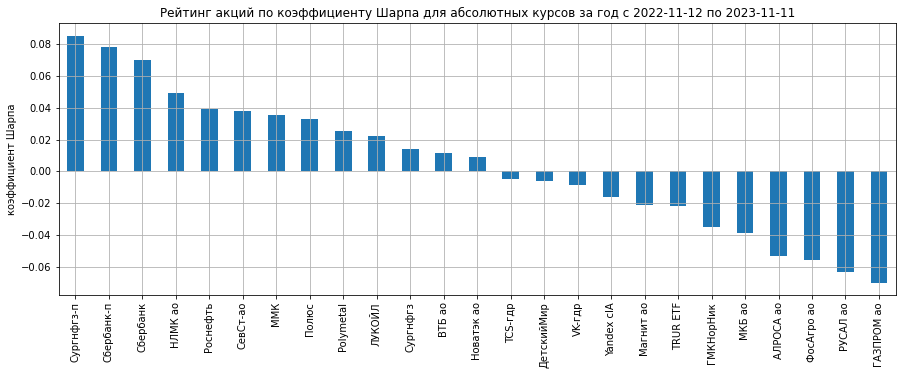

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для абсолютного курса голубые фишки Мосбиржи за год:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**Сургнфгз-п**|высокий коэффициент Шарпа (0.09)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сургнфгз-п)|
|**Сбербанк-п**|высокий коэффициент Шарпа (0.08)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк-п)|
|**Сбербанк**|высокий коэффициент Шарпа (0.07)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк)|
|**НЛМК ао**|высокий коэффициент Шарпа (0.05)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#НЛМК-ао)|
|**Роснефть**|высокий коэффициент Шарпа (0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Роснефть)|
|...|...|...|
|**МКБ ао**|низкий коэффициент Шарпа (-0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#МКБ-ао)|
|**АЛРОСА ао**|низкий коэффициент Шарпа (-0.05)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#АЛРОСА-ао)|
|**ФосАгро ао**|низкий коэффициент Шарпа (-0.06)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**РУСАЛ ао**|низкий коэффициент Шарпа (-0.06)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#РУСАЛ-ао)|
|**ГАЗПРОМ ао**|низкий коэффициент Шарпа (-0.07)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ГАЗПРОМ-ао)|


См.также: [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-год), [**Рейтинг абсолютной доходности за год**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-год), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-год), [**Рейтинг абсолютной стабильности валют за год**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-год), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за год**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-год)

# За 2 года

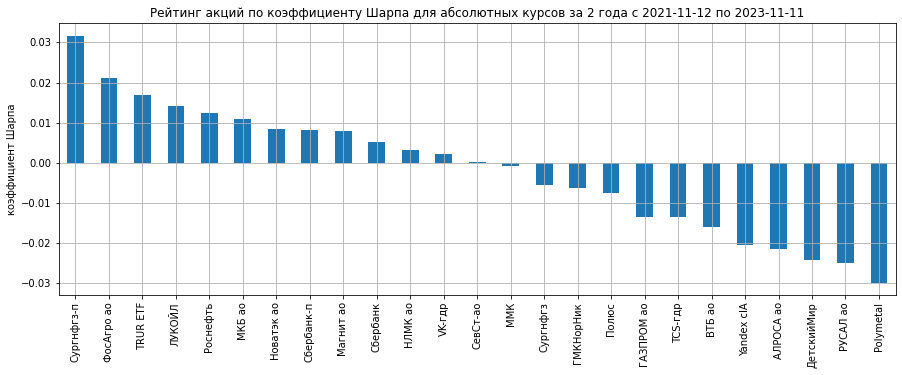

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для абсолютного курса голубые фишки Мосбиржи за 2 года:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**Сургнфгз-п**|высокий коэффициент Шарпа (0.03)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сургнфгз-п)|
|**ФосАгро ао**|высокий коэффициент Шарпа (0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**TRUR ETF**|высокий коэффициент Шарпа (0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TRUR-ETF)|
|**ЛУКОЙЛ**|высокий коэффициент Шарпа (0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ЛУКОЙЛ)|
|**Роснефть**|высокий коэффициент Шарпа (0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Роснефть)|
|...|...|...|
|**Yandex clA**|низкий коэффициент Шарпа (-0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Yandex-clA)|
|**АЛРОСА ао**|низкий коэффициент Шарпа (-0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#АЛРОСА-ао)|
|**ДетскийМир**|низкий коэффициент Шарпа (-0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ДетскийМир)|
|**РУСАЛ ао**|низкий коэффициент Шарпа (-0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#РУСАЛ-ао)|
|**Polymetal**|низкий коэффициент Шарпа (-0.03)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Polymetal)|


См.также: [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-2-года), [**Рейтинг абсолютной доходности за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-2-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-2-года), [**Рейтинг абсолютной стабильности валют за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-2-года), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 2 года**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-2-года)

# За 3 года

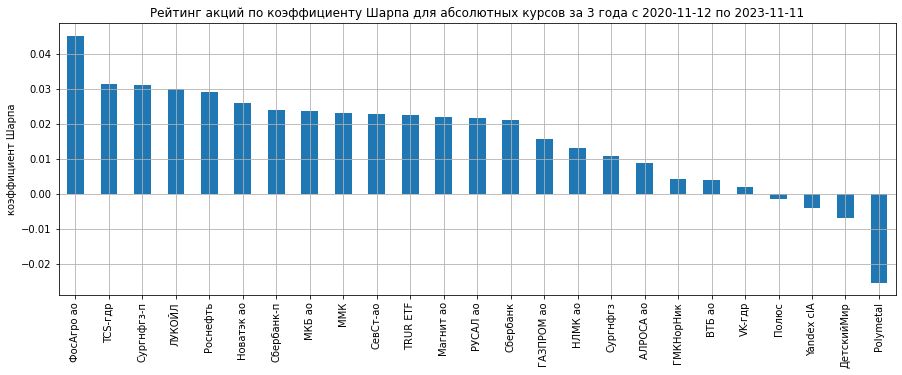

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для абсолютного курса голубые фишки Мосбиржи за 3 года:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**ФосАгро ао**|высокий коэффициент Шарпа (0.05)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**TCS-гдр**|высокий коэффициент Шарпа (0.03)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TCS-гдр)|
|**Сургнфгз-п**|высокий коэффициент Шарпа (0.03)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сургнфгз-п)|
|**ЛУКОЙЛ**|высокий коэффициент Шарпа (0.03)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ЛУКОЙЛ)|
|**Роснефть**|высокий коэффициент Шарпа (0.03)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Роснефть)|
|...|...|...|
|**VK-гдр**|низкий коэффициент Шарпа (0.0)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#VK-гдр)|
|**Полюс**|низкий коэффициент Шарпа (-0.0)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Полюс)|
|**Yandex clA**|низкий коэффициент Шарпа (-0.0)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Yandex-clA)|
|**ДетскийМир**|низкий коэффициент Шарпа (-0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ДетскийМир)|
|**Polymetal**|низкий коэффициент Шарпа (-0.03)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Polymetal)|


См.также: [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-3-года), [**Рейтинг абсолютной доходности за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-3-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-3-года), [**Рейтинг абсолютной стабильности валют за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-3-года), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 3 года**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-3-года)

# За 5 лет

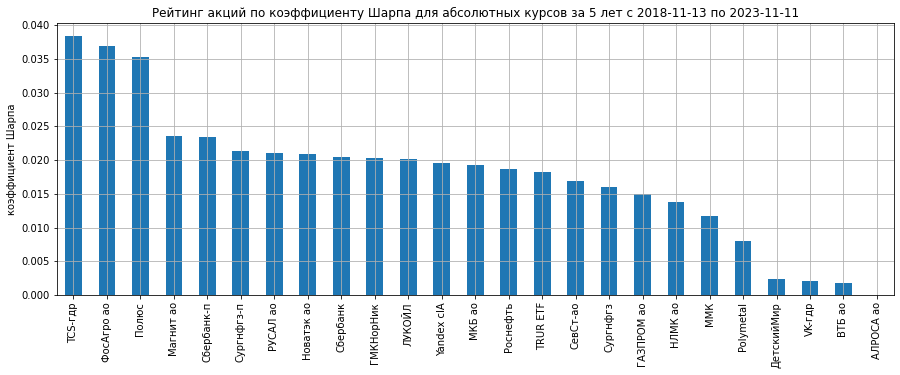

**Самые выгодные и самые невыгодные по коэффициенту Шарпа для абсолютного курса голубые фишки Мосбиржи за 5 лет:**

|Инструмент|Коэф.Шарпа|Ссылки|
|-|-|-|
|**TCS-гдр**|высокий коэффициент Шарпа (0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#TCS-гдр)|
|**ФосАгро ао**|высокий коэффициент Шарпа (0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ФосАгро-ао)|
|**Полюс**|высокий коэффициент Шарпа (0.04)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Полюс)|
|**Магнит ао**|высокий коэффициент Шарпа (0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Магнит-ао)|
|**Сбербанк-п**|высокий коэффициент Шарпа (0.02)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Сбербанк-п)|
|...|...|...|
|**Polymetal**|низкий коэффициент Шарпа (0.01)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#Polymetal)|
|**ДетскийМир**|низкий коэффициент Шарпа (0.0)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ДетскийМир)|
|**VK-гдр**|низкий коэффициент Шарпа (0.0)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#VK-гдр)|
|**ВТБ ао**|низкий коэффициент Шарпа (0.0)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#ВТБ-ао)|
|**АЛРОСА ао**|низкий коэффициент Шарпа (0.0)|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#АЛРОСА-ао)|


См.также: [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-5-лет), [**Рейтинг абсолютной доходности за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-5-лет), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-5-лет), [**Рейтинг абсолютной стабильности валют за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-5-лет), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-5-лет)

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import abscur_menu
import abscur_post as ap

# меню проекта печатаем
abscur_menu.print_menu()

# абсолютные курсы акций подкачиваем
s_abs = pd.read_csv("/kaggle/input/mmvb-abscur-blue-fishki/s_abscur.csv",index_col=0,parse_dates=['Date'])

# # расчет коэффициента Шарпа
# def sharpe_ratio(return_series, N=255, rf=0.01):
#     mean = return_series.mean() * N -rf
#     sigma = return_series.std() * np.sqrt(N)
#     return mean / sigma

def elem_quant_text(elems,elem,texts):
    if np.isnan(elem):
        elem = 0
    _end = "(" + str(np.round(elem*100,2)) + "%)"
    
    q_cnt = len(texts)
    
    for n in range(q_cnt):
        if elem <= elems.quantile((n+1)/q_cnt):
            return texts[q_cnt-n-1] + " " + _end

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

cnt = 0
texts = []
comments = []

for per,title_per in diap:
    display(Markdown("# За "+title_per))
    
    date_start = s_abs.asfreq(freq="D").index[-per]
    date_finish = s_abs.index[-1]
    
    sharp_texts = "высокий коэффициент Шарпа\tсредний коэффициент Шарпа\tнизкий коэффициент Шарпа".split("\t")
    res = (s_abs[s_abs.index >= date_start] / s_abs[s_abs.index >= date_start].median()).pct_change()
    res = res.mean()/res.std()
    
#     res = sharpe_ratio(s_abs[s_abs.index >= date_start].pct_change())
    res.sort_values(ascending=False,inplace=True)
    text = "Рейтинг акций по коэффициенту Шарпа для абсолютных курсов за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d")
    res.plot.bar(grid=True,title=text,ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    texts.append(text)
    plt.savefig(str(cnt)+".png")
    plt.show()
    cnt += 1
    
    comment = "Самые выгодные для вложений бумаги по абсолютному коэффициенту Шарпа: "
    text = "**Самые выгодные и самые невыгодные по коэффициенту Шарпа для абсолютного курса голубые фишки Мосбиржи за " + title_per + ":**\n\n"
    text += "|Инструмент|Коэф.Шарпа|Ссылки|\n"
    text += "|-|-|-|\n"
    for n in range(5):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + elem_quant_text(elems=res/100,elem=res[ticker]/100,texts=sharp_texts).replace('%','') + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#" + ticker.replace(" ","-") + ")|\n"
        comment += f", \"{ticker}\" ({elem_quant_text(elems=res/100,elem=res[ticker]/100,texts=sharp_texts).replace('%','')})"
    comment += "\nСамые невыгодные для вложений бумаги по абсолютному коэффициенту Шарпа: "
    text += "|...|...|...|\n"
    for n in range(len(res.index)-5,len(res.index)):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + elem_quant_text(elems=res/100,elem=res[ticker]/100,texts=sharp_texts).replace('%','') + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#" + ticker.replace(" ","-") + ")|\n"
        comment += f", \"{ticker}\" ({elem_quant_text(elems=res/100,elem=res[ticker]/100,texts=sharp_texts).replace('%','')})"
    display(Markdown(text))
    comments.append(comment.replace(": ,",":").replace("))",")"))
    
    text = "См.также: "
    text += "[**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))
    
#     break
    
num = np.random.randint(cnt)
ap.send_img_and_text(str(num)+".png",texts[num] + "\n\n" + comments[num] + "\n---\nИсточник - https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp")